### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
import gdown

file_id = '1r-itSyjoyGqGcBmUrligLubSBJy6ev5U'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'coupons.csv'
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1r-itSyjoyGqGcBmUrligLubSBJy6ev5U
To: /content/coupons.csv
100%|██████████| 2.15M/2.15M [00:00<00:00, 31.2MB/s]


In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0




```
# This is formatted as code
```

2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  int64   
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

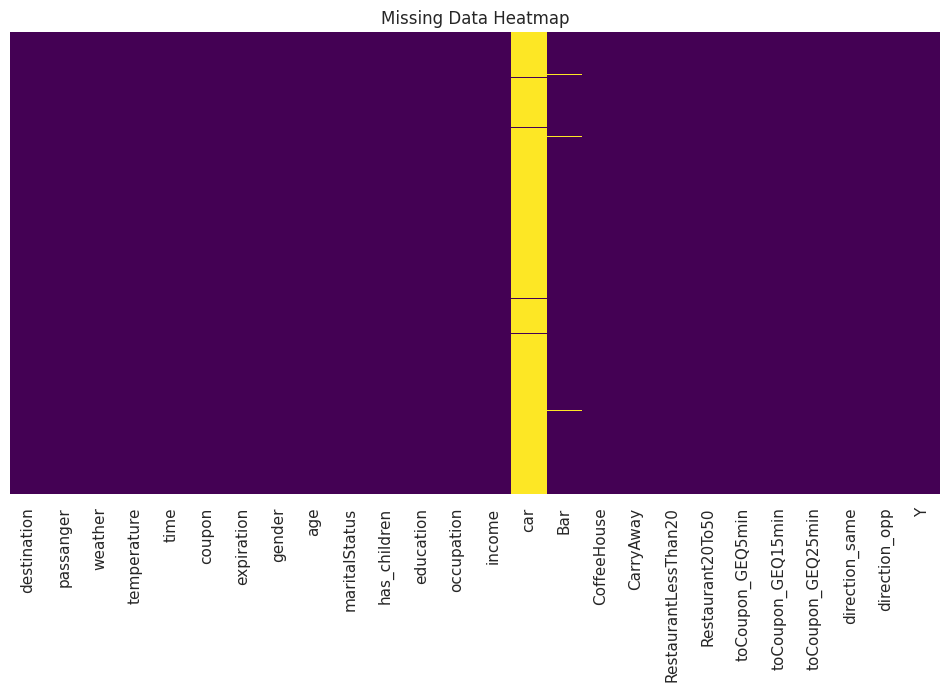

In [ ]:
data.info()

print("🔍 Dataset preview:")
print(data.head())

print("\n Number of rows and columns:", data.shape)

# Check for missing values
print("\n Missing values per column:")
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

# Check for problematic or inconsistent values in categorical columns
print("\n Unique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")

# Check for duplicated rows
duplicates = data.duplicated().sum()
print(f"\n Duplicated rows: {duplicates}")

# Check data types
print("\n Data types:")
print(data.dtypes)


plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Only apply to object (string) columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].map(lambda x: x.strip().lower() if isinstance(x, str) else x)

data.replace(['?', 'unknown', 'NaN'], pd.NA, inplace=True)

data

# 1. Standardize frequency ranges (e.g., '4~8' → '4 to 8')
range_columns = ['CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in range_columns:
    data[col] = data[col].replace({'4~8': '4 to 8', '1~3': '1 to 3', 'NaN': np.nan, 'never': '0'})

# 2. Convert '0', 'less than 1', '1 to 3', etc. to ordered categories (optional, useful for modeling)
ordered_categories = ['0', 'less than 1', '1 to 3', '4 to 8', 'greater than 8']
for col in range_columns:
    data[col] = pd.Categorical(data[col], categories=ordered_categories, ordered=True)

# 3. Impute missing values with mode (most frequent category)
for col in range_columns:
    if data[col].isnull().sum() > 0:
        mode_val = data[col].mode().iloc[0]
        data[col] = data[col].fillna(mode_val)

# 4. Confirm cleaning
print("Cleaned value counts (example):")
for col in range_columns:
    print(f"{col}:\n{data[col].value_counts(dropna=False)}\n")

Cleaned value counts (example):
CoffeeHouse:
CoffeeHouse
1 to 3            7938
0                 2962
4 to 8            1784
less than 1          0
greater than 8       0
Name: count, dtype: int64

CarryAway:
CarryAway
1 to 3            8273
4 to 8            4258
0                  153
less than 1          0
greater than 8       0
Name: count, dtype: int64

RestaurantLessThan20:
RestaurantLessThan20
1 to 3            8884
4 to 8            3580
0                  220
less than 1          0
greater than 8       0
Name: count, dtype: int64

Restaurant20To50:
Restaurant20To50
1 to 3            9820
0                 2136
4 to 8             728
less than 1          0
greater than 8       0
Name: count, dtype: int64



4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Count of total and accepted coupons
total = len(data)
accepted = data['Y'].sum()  # Since Y=1 means accepted

# Proportion accepted
proportion_accepted = accepted / total

print(f"Proportion of accepted coupons: {proportion_accepted:.2%}")

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-1055115766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, palette='Set2')


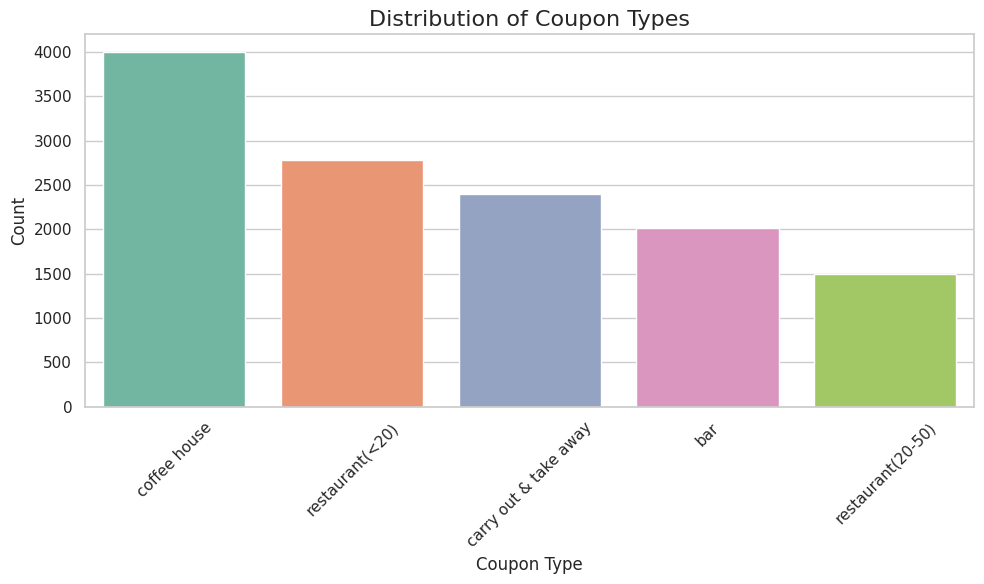

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Countplot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, palette='Set2')

# Titles and labels
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

6. Use a histogram to visualize the temperature column.

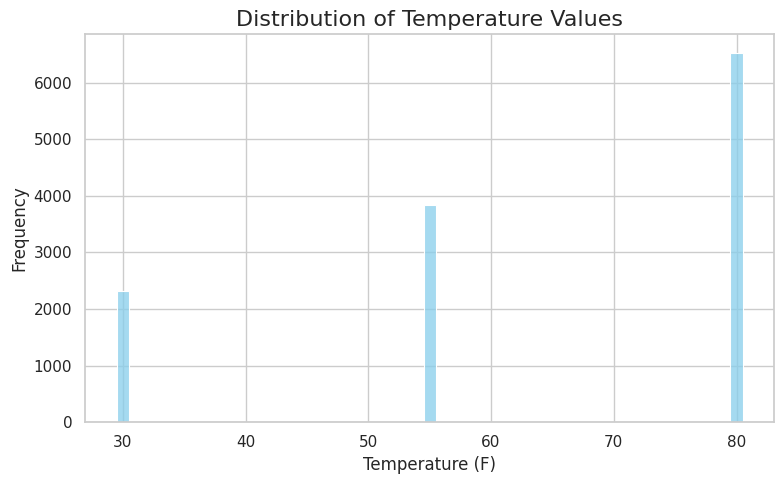

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', bins=10, kde=False, discrete=True, color='skyblue')

# Titles and labels
plt.title('Distribution of Temperature Values', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# Create a DataFrame for bar-related coupons only
bar_df = data[data['coupon'] == 'bar'].copy()

# Check the shape and preview the data
print(f"Number of bar coupon entries: {bar_df.shape[0]}")
bar_df.head()

Number of bar coupon entries: 2017


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,no urgent place,kid(s),sunny,80,10am,bar,1d,female,21,unmarried partner,...,0,1 to 3,4 to 8,1 to 3,1,1,0,0,1,0
13,home,alone,sunny,55,6pm,bar,1d,female,21,unmarried partner,...,0,1 to 3,4 to 8,1 to 3,1,0,0,1,0,1
17,work,alone,sunny,55,7am,bar,1d,female,21,unmarried partner,...,0,1 to 3,4 to 8,1 to 3,1,1,1,0,1,0
24,no urgent place,friend(s),sunny,80,10am,bar,1d,male,21,single,...,1 to 3,4 to 8,4 to 8,1 to 3,1,0,0,0,1,1
35,home,alone,sunny,55,6pm,bar,1d,male,21,single,...,1 to 3,4 to 8,4 to 8,1 to 3,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [ ]:
# Proportion of accepted bar coupons (Y = 1)
bar_accepted_proportion = bar_df['Y'].mean()

print(f"Proportion of bar coupons accepted: {bar_accepted_proportion:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or

*   List item
*   List item

fewer times a month to those who went more.


In [ ]:
# Define the categories for grouping
few_bar_visits = ['0', 'less than 1', '1 to 3']
frequent_bar_visits = ['4 to 8', 'greater than 8']

# Group: 3 or fewer times per month
few_visits_df = bar_df[bar_df['Bar'].isin(few_bar_visits)]
few_acceptance_rate = few_visits_df['Y'].mean()

# Group: More than 3 times per month
more_visits_df = bar_df[bar_df['Bar'].isin(frequent_bar_visits)]
more_acceptance_rate = more_visits_df['Y'].mean()

# Print the results
print(f"Acceptance rate for ≤ 3 bar visits/month: {few_acceptance_rate:.2%}")
print(f"Acceptance rate for > 3 bar visits/month: {more_acceptance_rate:.2%}")

Acceptance rate for ≤ 3 bar visits/month: nan%
Acceptance rate for > 3 bar visits/month: nan%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Filter bar coupons only
bar_df = data[data['coupon'] == 'bar'].copy()

# Define bar visit categories indicating more than once a month
bar_more_than_once = ['1 to 3', '4 to 8', 'greater than 8']

# Define age categories that are greater than 25
age_over_25 = ['26 to 30', '31 to 35', '36 to 40', '41 to 45', '46 to 50', '50 or older']

# Group A: More than once a month to a bar AND age > 25
group_a = bar_df[(bar_df['Bar'].isin(bar_more_than_once)) & (bar_df['age'].isin(age_over_25))]

# Group B: All others
group_b = bar_df.drop(group_a.index)

# Calculate acceptance rates
accept_rate_a = group_a['Y'].mean()
accept_rate_b = group_b['Y'].mean()

# Print the results
print(f"Group A (Frequent bar-goers >25): {accept_rate_a:.2%} acceptance rate")
print(f"Group B (All others): {accept_rate_b:.2%} acceptance rate")

Group A (Frequent bar-goers >25): nan% acceptance rate
Group B (All others): 41.00% acceptance rate


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Step 1: Filter only bar-related coupons
bar_df = data[data['coupon'] == 'bar'].copy()

# Step 2: Define filters
bar_more_than_once = ['1 to 3', '4 to 8', 'greater than 8']
excluded_passenger = 'kid(s)'
excluded_occupation = 'farming fishing & forestry'

# Step 3: Apply filters for Group A
group_a = bar_df[
    (bar_df['Bar'].isin(bar_more_than_once)) &
    (bar_df['passanger'] != excluded_passenger) &
    (bar_df['occupation'] != excluded_occupation)
]

# Step 4: Group B = all other drivers
group_b = bar_df.drop(group_a.index)

# Step 5: Calculate acceptance rates
accept_rate_a = group_a['Y'].mean()
accept_rate_b = group_b['Y'].mean()

# Step 6: Display results
print(f"Group A (Frequent bar-goers, no kids, not farming/fishing): {accept_rate_a:.2%}")
print(f"Group B (All others): {accept_rate_b:.2%}")

Group A (Frequent bar-goers, no kids, not farming/fishing): nan%
Group B (All others): 41.00%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
# Step 1: Filter bar-related coupons only
bar_df = data[data['coupon'] == 'bar'].copy()

# Step 2: Define conditions for each rule
bar_more_than_once = ['1 to 3', '4 to 8', 'greater than 8']
age_under_30 = ['below 21', '21 to 25', '26 to 30']
low_income = ['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
cheap_rest_more_than_4 = ['4 to 8', 'greater than 8']

# Rule 1: bar > once/month AND passenger != kid AND marital status != widowed
rule1 = (
    (bar_df['Bar'].isin(bar_more_than_once)) &
    (bar_df['passanger'] != 'kid(s)') &
    (bar_df['maritalStatus'] != 'widowed')
)

# Rule 2: bar > once/month AND age < 30
rule2 = (
    (bar_df['Bar'].isin(bar_more_than_once)) &
    (bar_df['age'].isin(age_under_30))
)

# Rule 3: cheap restaurants > 4/month AND income < $50K
rule3 = (
    (bar_df['RestaurantLessThan20'].isin(cheap_rest_more_than_4)) &
    (bar_df['income'].isin(low_income))
)

# Combine all rules with OR
group_a = bar_df[rule1 | rule2 | rule3]

# Group B = all others
group_b = bar_df.drop(group_a.index)

# Calculate acceptance rates
accept_rate_a = group_a['Y'].mean()
accept_rate_b = group_b['Y'].mean()

# Show results
print(f"Group A (matches at least one rule): {accept_rate_a:.2%}")
print(f"Group B (all others): {accept_rate_b:.2%}")

Group A (matches at least one rule): 39.92%
Group B (all others): 41.15%


*7*.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Assume 'bar_df' contains only rows where coupon == 'bar'
bar_df = data[data['coupon'] == 'bar'].copy()

# Setup conditions
bar_more_than_once = ['1 to 3', '4 to 8', 'greater than 8']
young_ages = ['below 21', '21 to 25', '26 to 30']
low_income = ['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
cheap_rest_freq = ['4 to 8', 'greater than 8']

# 1. Frequent bar-goers
frequent_bar_goers = bar_df[bar_df['Bar'].isin(bar_more_than_once)]
print("1. Frequent bar-goers acceptance rate:", frequent_bar_goers['Y'].mean())

# 2. No kids as passengers
no_kids = bar_df[bar_df['passanger'] != 'kid(s)']
print("2. No kids in car acceptance rate:", no_kids['Y'].mean())

# 3. Age under 30
young_drivers = bar_df[bar_df['age'].isin(young_ages)]
print("3. Age under 30 acceptance rate:", young_drivers['Y'].mean())

# 4. Not widowed
not_widowed = bar_df[bar_df['maritalStatus'] != 'widowed']
print("4. Not widowed acceptance rate:", not_widowed['Y'].mean())

# 5. Low income & frequent cheap restaurants
low_income_diners = bar_df[
    (bar_df['income'].isin(low_income)) &
    (bar_df['RestaurantLessThan20'].isin(cheap_rest_freq))
]
print("5. Low income + eats out often (<$20) acceptance rate:", low_income_diners['Y'].mean())

# 6. Match any of the above (composite group)
composite_group = bar_df[
    (bar_df['Bar'].isin(bar_more_than_once) & (bar_df['passanger'] != 'kid(s)') & (bar_df['maritalStatus'] != 'widowed')) |
    (bar_df['Bar'].isin(bar_more_than_once) & (bar_df['age'].isin(young_ages))) |
    ((bar_df['RestaurantLessThan20'].isin(cheap_rest_freq)) & (bar_df['income'].isin(low_income)))
]
composite_acceptance = composite_group['Y'].mean()
others_acceptance = bar_df.drop(composite_group.index)['Y'].mean()

print("6. Composite group acceptance rate:", composite_acceptance)
print("7.  Others acceptance rate:", others_acceptance)

1. Frequent bar-goers acceptance rate: nan
2. No kids in car acceptance rate: 0.43290999447818884
3. Age under 30 acceptance rate: nan
4. Not widowed acceptance rate: 0.41082164328657317
5. Low income + eats out often (<$20) acceptance rate: 0.39919354838709675
6. Composite group acceptance rate: 0.39919354838709675
7.  Others acceptance rate: 0.4115319389485585


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# 1. Filter for coffee house coupons only
coffee_df = data[data['coupon'] == 'coffee house'].copy()

# 2. Check distribution of passengers
print(coffee_df['passanger'].value_counts())

# 3. Calculate acceptance rate by passenger type
acceptance_by_passenger = coffee_df.groupby('passanger')['Y'].mean().sort_values(ascending=False)

# 4. Display results
print("\nAcceptance rate by passenger type:")
print(acceptance_by_passenger)

passanger
alone        2256
friend(s)    1228
partner       305
kid(s)        207
Name: count, dtype: int64

Acceptance rate by passenger type:
passanger
friend(s)    0.596906
partner      0.570492
kid(s)       0.483092
alone        0.437943
Name: Y, dtype: float64


/tmp/ipython-input-3546177973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values, palette='Set3')


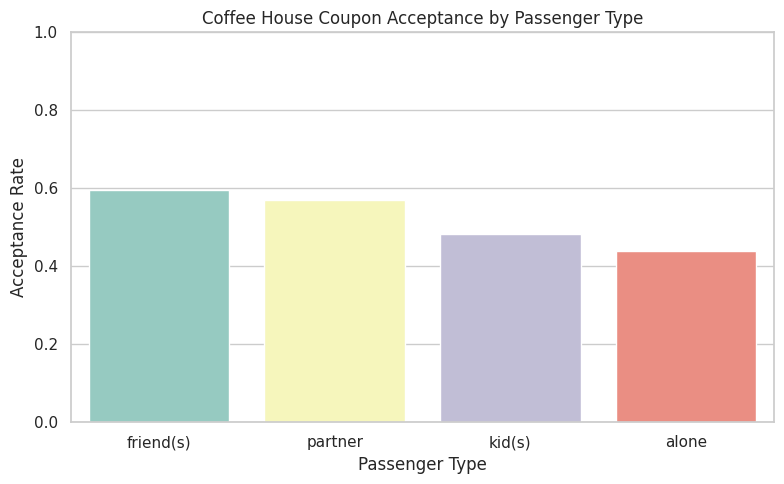

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values, palette='Set3')

plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

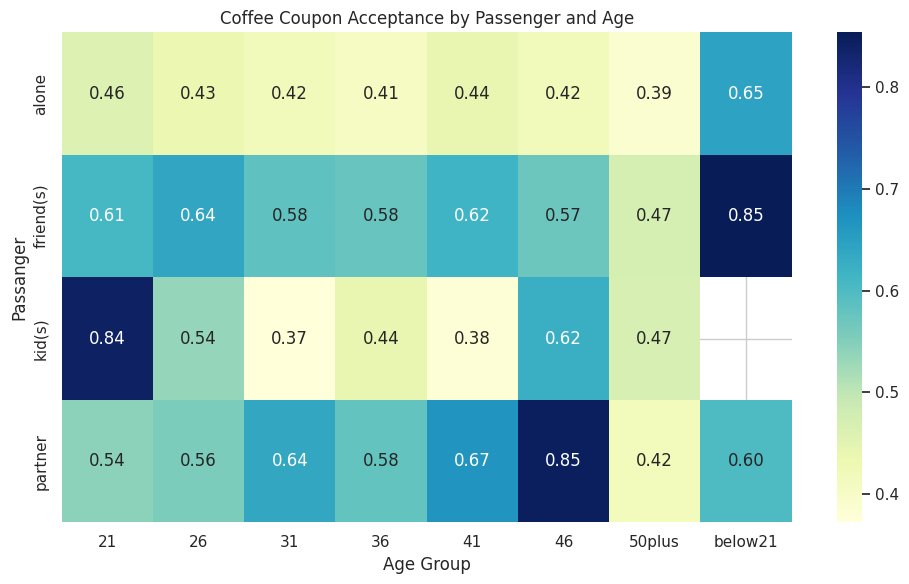

In [ ]:
# Group by passenger and age
acceptance_by_passenger_age = coffee_df.groupby(['passanger', 'age'])['Y'].mean().unstack()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(acceptance_by_passenger_age, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Coffee Coupon Acceptance by Passenger and Age')
plt.ylabel('Passanger')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

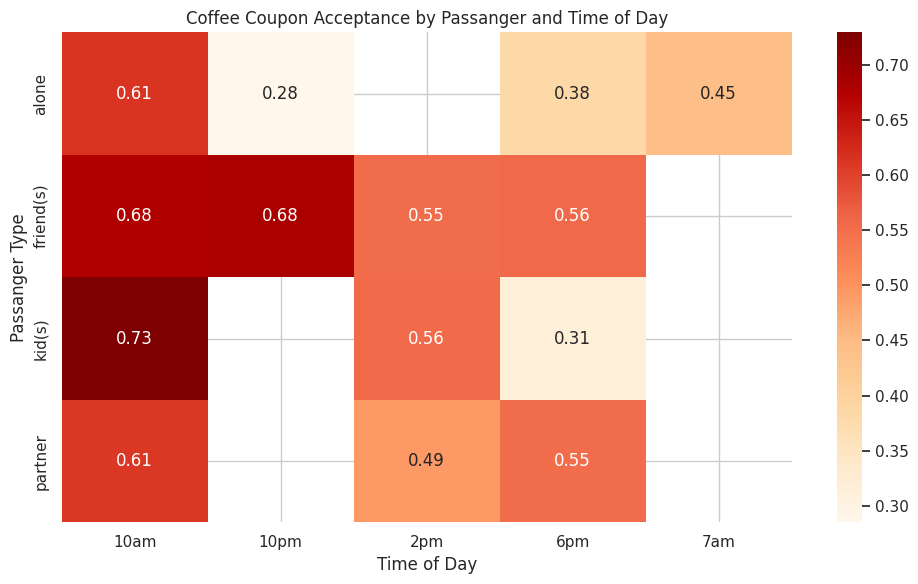

In [ ]:
acceptance_by_passenger_time = coffee_df.groupby(['passanger', 'time'])['Y'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(acceptance_by_passenger_time, annot=True, cmap="OrRd", fmt=".2f")
plt.title('Coffee Coupon Acceptance by Passanger and Time of Day')
plt.ylabel('Passanger Type')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1180490003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_by_passenger_freq = coffee_df.groupby(['passanger', 'CoffeeHouse'])['Y'].mean().unstack()


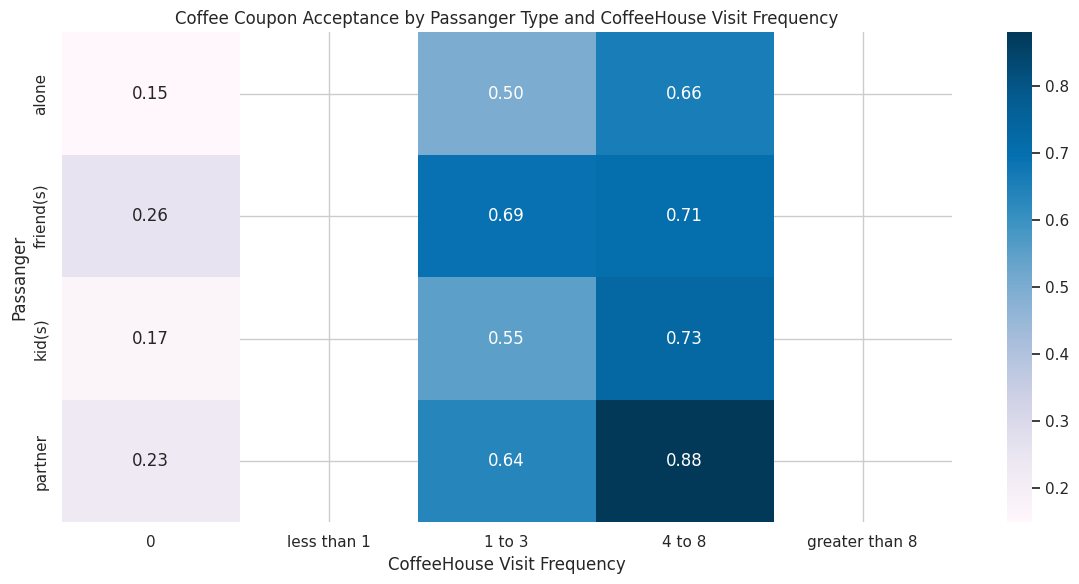

In [ ]:
# Frequency options may be: ['0', 'less than 1', '1 to 3', '4 to 8', 'greater than 8']
acceptance_by_passenger_freq = coffee_df.groupby(['passanger', 'CoffeeHouse'])['Y'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(acceptance_by_passenger_freq, annot=True, cmap="PuBu", fmt=".2f")
plt.title('Coffee Coupon Acceptance by Passanger Type and CoffeeHouse Visit Frequency')
plt.ylabel('Passanger')
plt.xlabel('CoffeeHouse Visit Frequency')
plt.tight_layout()
plt.show()

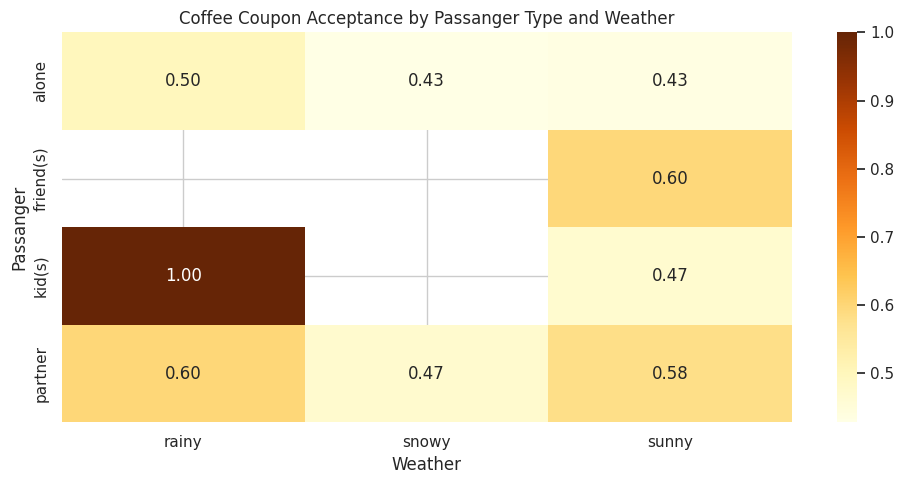

In [ ]:
acceptance_by_passenger_weather = coffee_df.groupby(['passanger', 'weather'])['Y'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(acceptance_by_passenger_weather, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title('Coffee Coupon Acceptance by Passanger Type and Weather')
plt.ylabel('Passanger')
plt.xlabel('Weather')
plt.tight_layout()
plt.show()

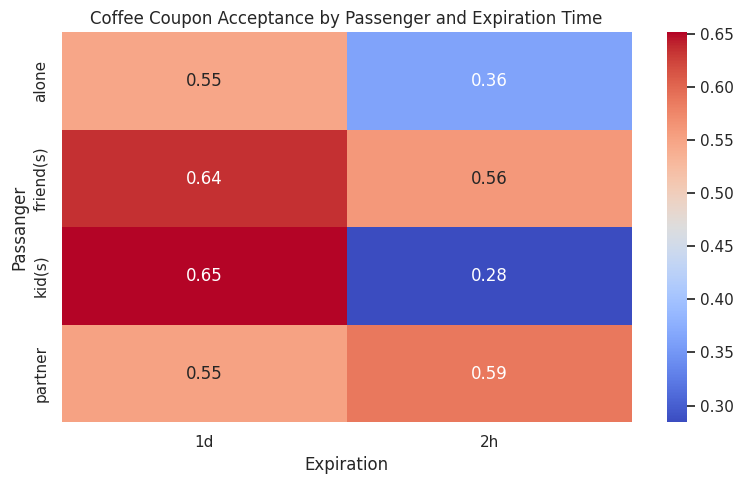

In [ ]:
acceptance_by_passenger_expire = coffee_df.groupby(['passanger', 'expiration'])['Y'].mean().unstack()

plt.figure(figsize=(8, 5))
sns.heatmap(acceptance_by_passenger_expire, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Coffee Coupon Acceptance by Passenger and Expiration Time')
plt.ylabel('Passanger')
plt.xlabel('Expiration')
plt.tight_layout()
plt.show()